<h2> O objetivo deste projetoé tentar prever o tempo de sobrevivência de pacientes um ano após o transplante de fígado. <br/><br/>
     Os dados foram extraídos do SRTR (The Scientific Registry of Transplant Recipients) <br/><br/>
     
O Dataset possui mais de 30 variáveis com dados dos pacientes.</h2>

In [11]:
# Importando as bibliotecas
library(dplyr)
library(ggcorrplot)
library(forecast)
library(nnet)
library(neuralnet)
warning=FALSE

In [10]:
# Carregando os dados
dados = read.csv("HealthAnalytics.csv", header = TRUE, na.strings = c(""))
dim(dados)

[1] 79100    46

In [14]:
# Verificando os dados iniciais do dataset
dados

ï..DAYSWAIT_CHRON,PSTATUS,FINAL_MELD_SCORE,PTIME,TX_DATE,PX_STAT,PX_STAT_DATE,AGE,ABO,GENDER,...,ABO_MAT,COLD_ISCH,MALIG,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,TX_MELD,LISTYR,LiverSize,LiverSizeDon
7,0,39,51,12/24/2018,A,2/13/2019,30,O,1,...,1,4.30,U,162.6,45.0,17.0,No,2018,1721.500,2276.860
5,0,19,6,12/23/2018,A,12/29/2018,63,A,0,...,1,3.48,U,177.8,85.0,26.9,No,2018,1934.720,2387.360
10,0,22,6,12/28/2018,A,1/3/2019,48,B,0,...,1,4.95,U,182.9,76.2,22.8,No,2018,1987.348,2555.460
9,0,35,27,12/27/2018,A,1/23/2019,54,O,1,...,1,3.62,U,154.9,61.1,25.5,No,2018,1669.494,2255.140
2,0,35,54,12/20/2018,A,2/12/2019,71,O,1,...,1,7.50,U,162.6,70.8,26.8,No,2018,1605.492,2214.884
6,0,19,10,12/24/2018,A,1/3/2019,62,O,1,...,1,5.33,U,160.0,122.6,47.9,No,2018,2546.924,1789.178
4,0,35,51,12/22/2018,A,2/11/2019,62,O,1,...,1,9.14,U,152.4,45.4,19.5,No,2018,1316.356,2576.640
9,1,14,0,12/28/2018,D,12/28/2018,56,A,0,...,1,5.25,U,172.7,95.7,32.1,No,2018,2195.298,1580.986
1,1,36,3,12/20/2018,D,12/23/2018,28,B,1,...,1,4.60,U,168.0,95.0,33.7,No,2018,2544.220,2242.440
11,0,23,6,12/30/2018,A,1/5/2019,66,A,0,...,1,5.60,Y,170.0,71.9,24.9,No,2018,1687.326,2019.038


<h3> Análise Exploratória, Limpeza, Transformação e Manipulação de Dados (Data Wrangling) </h3>


In [90]:
# Resumo estatístico dos dados
summary(dados)

 ï..DAYSWAIT_CHRON PSTATUS   FINAL_MELD_SCORE     PTIME            TX_DATE     
 Min.   :   0.0    0:55634   Min.   : 6.00    Min.   :   0   6/7/2017  :   36  
 1st Qu.:  19.0    1:23466   1st Qu.:13.00    1st Qu.: 390   7/12/2018 :   33  
 Median :  87.0              Median :20.00    Median :1431   11/30/2016:   32  
 Mean   : 228.5              Mean   :20.87    Mean   :1793   4/26/2018 :   31  
 3rd Qu.: 266.0              3rd Qu.:28.00    3rd Qu.:2889   6/13/2018 :   31  
 Max.   :5886.0              Max.   :40.00    Max.   :6001   1/18/2017 :   30  
                                              NA's   :4      (Other)   :78907  
 PX_STAT       PX_STAT_DATE        AGE             ABO        GENDER   
 A:56020   12/3/2018 :  265   Min.   :18.00   O      :34871   0:53312  
 D:23080   11/27/2018:  250   1st Qu.:50.00   A      :29111   1:25788  
           12/17/2018:  250   Median :56.00   B      :10828            
           12/18/2018:  243   Mean   :54.97   AB     : 4115            


In [15]:
# Tipos dos dados
str(dados)

'data.frame':	79100 obs. of  46 variables:
 $ ï..DAYSWAIT_CHRON   : int  7 5 10 9 2 6 4 9 1 11 ...
 $ PSTATUS             : int  0 0 0 0 0 0 0 1 1 0 ...
 $ FINAL_MELD_SCORE    : int  39 19 22 35 35 19 35 14 36 23 ...
 $ PTIME               : int  51 6 6 27 54 10 51 0 3 6 ...
 $ TX_DATE             : Factor w/ 6139 levels "1/1/2003","1/1/2004",..: 1822 1805 1890 1873 1754 1822 1788 1890 1754 1941 ...
 $ PX_STAT             : Factor w/ 2 levels "A","D": 1 1 1 1 1 1 1 2 2 1 ...
 $ PX_STAT_DATE        : Factor w/ 5774 levels ".","1/1/2003",..: 2046 1818 377 264 2030 377 2013 1803 1723 442 ...
 $ AGE                 : int  30 63 48 54 71 62 62 56 28 66 ...
 $ ABO                 : Factor w/ 8 levels "A","A1","A1B",..: 8 1 7 8 8 8 8 1 7 1 ...
 $ GENDER              : int  1 0 0 1 1 1 1 0 1 0 ...
 $ WGT_KG_TCR          : num  56.2 81.9 78.9 63.5 75.8 ...
 $ HGT_CM_TCR          : num  163 178 181 155 163 ...
 $ BMI_TCR             : num  21.3 25.9 24.1 26.4 28.7 ...
 $ DIAB                : in

<h2> A idade média das pessoas que recebem o transplante de fígado é de 55 anos <br/><br/>
    50% das pessoas que necessitam de transplante tem entre 50 à 62 anos </h2>

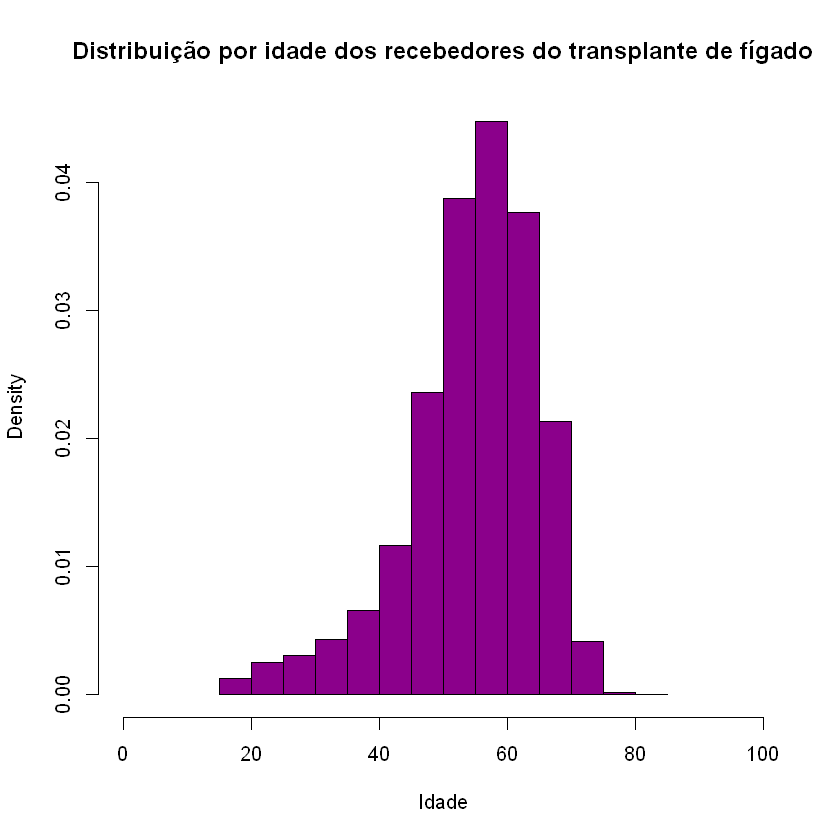

In [97]:
# Analisando as idades das pessoas que RECEBEM o transplante de fígado
hist(dados$AGE,
main="Distribuição por idade dos recebedores do transplante de fígado",
xlab="Idade",
xlim=c(0,100),
col="darkmagenta",
freq=FALSE
)

<h2> A idade média das pessoas que doam o transplante de fígado é de 51 anos <br/><br/>
    50% das pessoas que necessitam de transplante tem entre 26 à 54 anos </h2>

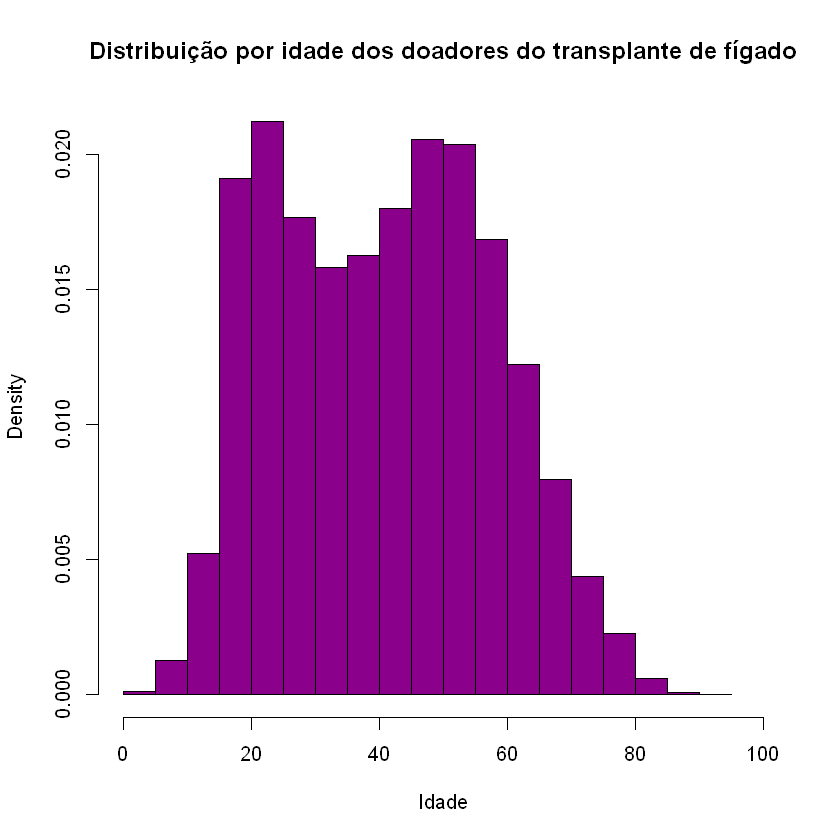

In [98]:
# Analisando as idades das pessoas que DOAM o transplante de fígado
hist(dados$AGE_DON,
main="Distribuição por idade dos doadores do transplante de fígado",
xlab="Idade",
xlim=c(0,100),
col="darkmagenta",
freq=FALSE
)


<h2> Representação da quantidade de dias que as pessoas transplantadas sobrevivem após o transplante <br/> <br/>
A média de dias sobrevividos após o transplante é de 1.793 dias <br/><br/>
50% das pessoas que recebem o transplante sobrevivem entre 1.431 a 2.889 dias</h2>

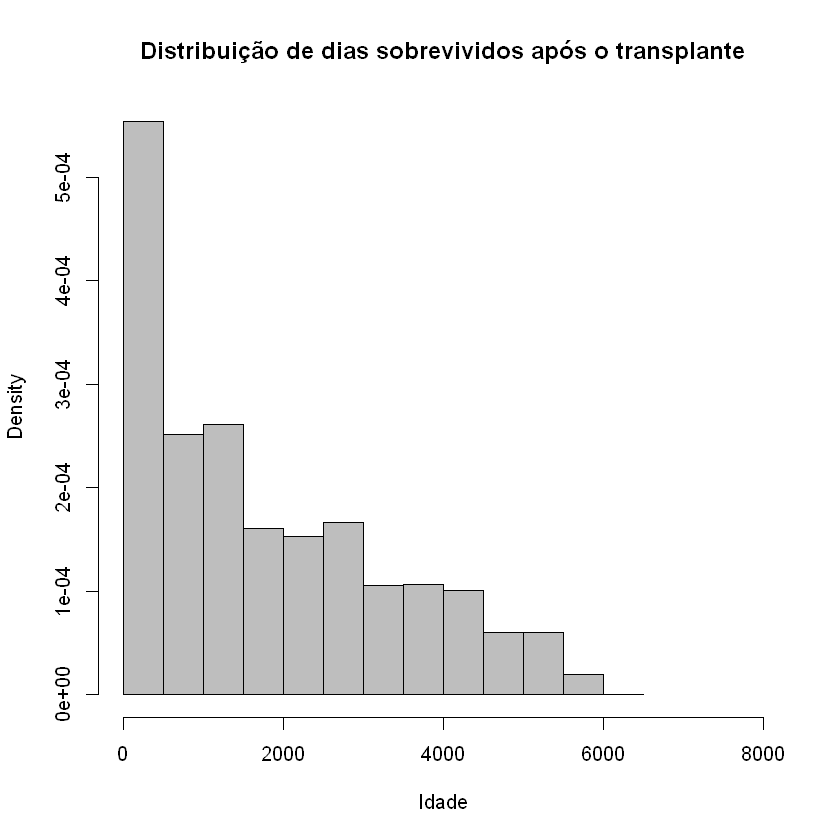

In [110]:
# Analisando o número de dias que as pessoas que RECEBEM o transplante de fígado sobrevivem após o transplante
hist(dados$PTIME,
main="Distribuição de dias sobrevividos após o transplante",
xlab="Idade",
xlim=c(0,8000),
col="gray",
freq=FALSE
)


<h2> Analisando a variável FINAL_MELD_SCORE, que corresponde a pontuações dadas pelos médicos aos pacientes conforme a severidade e urgência do transplante <br/> <br/>
 Quanto maior a pontuação, mais severo e urgente a necessidade de um transplante de fígado </h2>

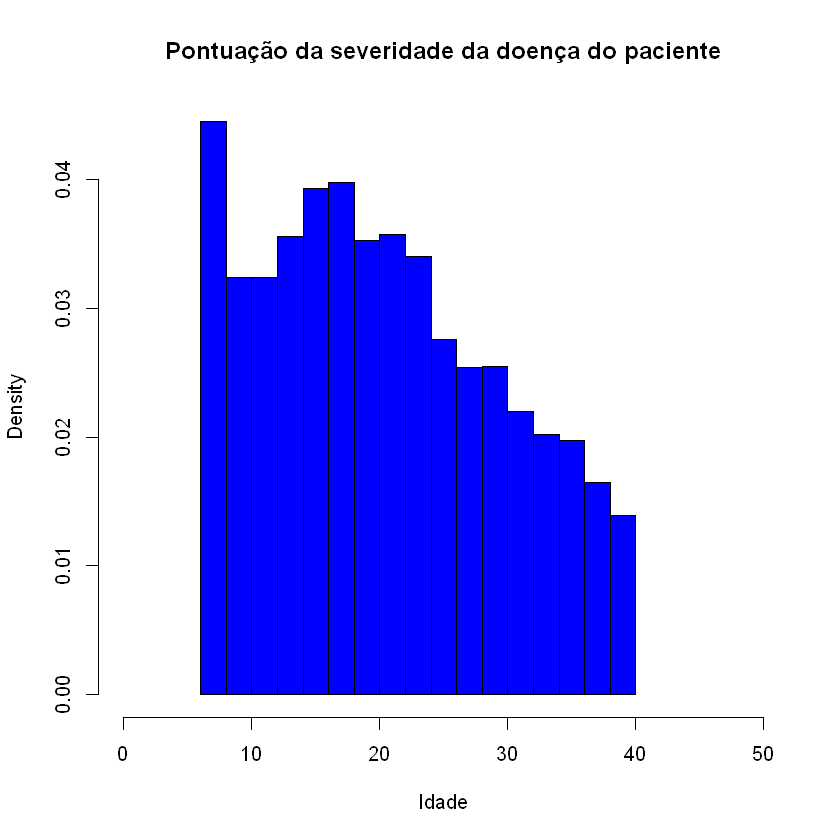

In [108]:
# Analisando as pontuações dadas pelos médicos aos pacientes conforme a severidade e urgência do transplante
# Quanto maior a pontuação, mais severo e urgente a necessidade de um transplante de fígado
hist(dados$FINAL_MELD_SCORE,
main="Pontuação da severidade da doença do paciente",
xlab="Idade",
xlim=c(0,50),
col="blue",
freq=FALSE
)


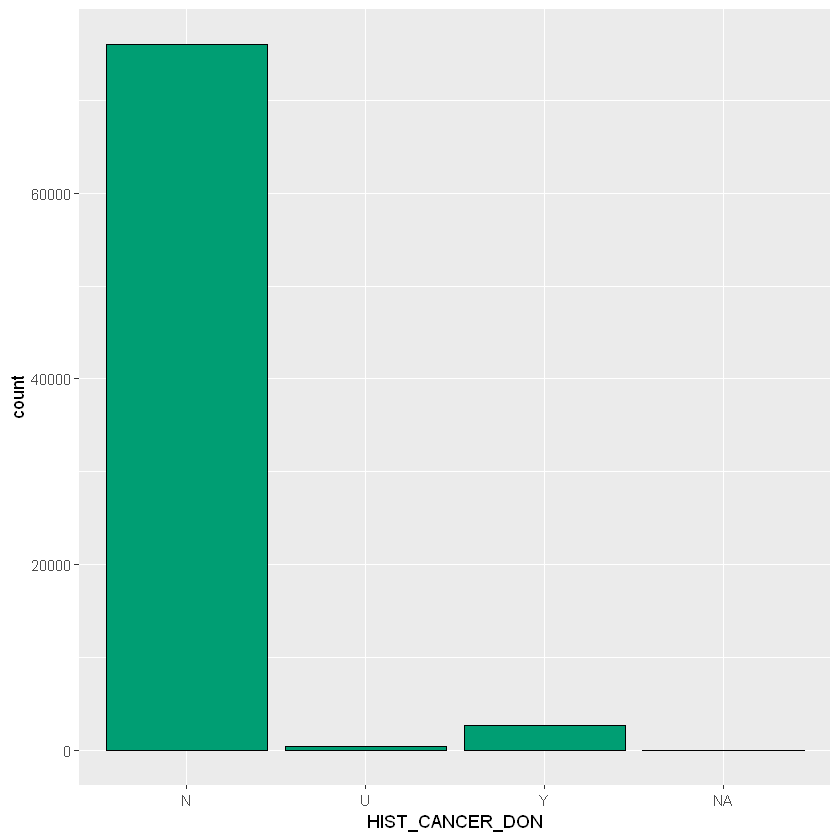

In [116]:
# Histórico de câncer dos pacientes doadores de fígado
ggplot(dados) + geom_bar(aes(x = HIST_CANCER_DON), fill="#009E73", colour="black")

<h2># Explorando os dados das variáveis categóricas</h2>

In [47]:
# Converter variáveis numéricas para fator 
dados$DIAB = as.factor(dados$DIAB)
table(dados$DIAB)
dados$PSTATUS = as.factor(dados$PSTATUS)
table(dados$PSTATUS)
dados$GENDER = as.factor(dados$GENDER)
dados$GENDER_DON = as.factor(dados$GENDER_DON)
table(dados$GENDER)
table(dados$GENDER_DON)
dados$REGION = as.factor(dados$REGION)
table(dados$REGION)
dados$TX_Year = as.factor(dados$TX_Year)
table(dados$TX_Year)
dados$MALIG = as.factor(dados$MALIG)
table(dados$MALIG)
dados$HIST_CANCER_DON = as.factor(dados$HIST_CANCER_DON)
table(dados$HIST_CANCER_DON)


    1     2     3     4     5   998 
57017  1520 16476   309  2939   828 


    0     1 
55634 23466 


    0     1 
53312 25788 


    0     1 
47310 31790 


    1     2     3     4     5     6     7     8     9    10    11 
 2802  9435 14070  7436  9962  2505  6503  5458  4745  7656  8528 


2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 
   1 1456 2948 3717 4062 4475 4501 4459 4641 4583 4745 4751 4898 5128 5430 6239 
2017 2018 
6519 6547 


    N     U     Y 
42828 21290 14982 


    N     U     Y 
76040   398  2660 

In [48]:
# Considerando apenas os pacientes que sobreviveram ao primeiro ano de cirurgia
dados1 = dados %>%
  filter(PTIME = 365) %>%
  mutate(PTIME = (PTIME - 365))


ERROR: `PTIME` (`PTIME = 365`) must not be named, do you need `==`?

In [43]:
dados1

ï..DAYSWAIT_CHRON,PSTATUS,FINAL_MELD_SCORE,PTIME,TX_DATE,PX_STAT,PX_STAT_DATE,AGE,ABO,GENDER,...,ABO_MAT,COLD_ISCH,MALIG,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,TX_MELD,LISTYR,LiverSize,LiverSizeDon
10,0,14,5325,3/9/2002,A,10/6/2017,54,A,0,...,1,4.8,Y,164.0,82.0,30.5,No,2002,2002.640,1881.280
110,1,13,2658,6/17/2002,D,9/26/2010,66,B,0,...,2,5.0,U,180.0,95.0,29.3,No,2002,2055.540,2384.090
1104,1,22,4334,3/7/2005,D,1/17/2018,67,A1,1,...,1,8.3,N,160.0,70.8,27.6,No,2002,1656.932,1886.360
2131,0,26,3530,12/29/2007,A,8/28/2018,56,B,0,...,1,5.5,N,165.1,58.5,21.5,No,2002,1602.330,2174.222
31,1,7,3464,3/30/2002,D,9/22/2012,44,B,0,...,2,3.5,Y,170.2,70.8,24.4,No,2002,1952.712,2051.566
640,0,15,5142,11/29/2003,A,12/27/2018,50,B,0,...,1,4.0,N,172.7,101.6,34.1,No,2002,2366.504,2311.660
18,0,16,5440,3/17/2002,A,2/6/2018,41,O,0,...,1,6.0,N,174.5,82.8,27.2,No,2002,2182.572,2247.438
577,0,7,5107,9/28/2003,A,9/21/2018,50,A,0,...,1,6.0,N,175.0,94.9,31.0,No,2002,2259.706,2603.280
481,1,21,4496,6/24/2003,D,10/14/2016,44,O,0,...,1,10.0,U,190.0,49.0,NA,No,2002,1605.220,1622.106
69,0,13,5558,5/8/2002,A,7/26/2018,49,O,0,...,1,7.0,N,180.3,76.4,23.5,No,2002,1977.676,2266.324


In [49]:
# Dos pacientes que sobreviveram ao primeiro ano da cirurgia,
# filtramos os que permaneceram vivos por até três anos depois da cirurgia.
dados2 = dados1 %>%  filter(PTIME <= 1095)

In [50]:
# Vamos separar variáveis numéricas e categóricas
dados_num = dados2[,!unlist(lapply(dados2, is.factor))]
dim(dados_num)

dados_fator = dados2[,unlist(lapply(dados2, is.factor))]
dim(dados_fator)

[1] 23348    25

[1] 23348    21

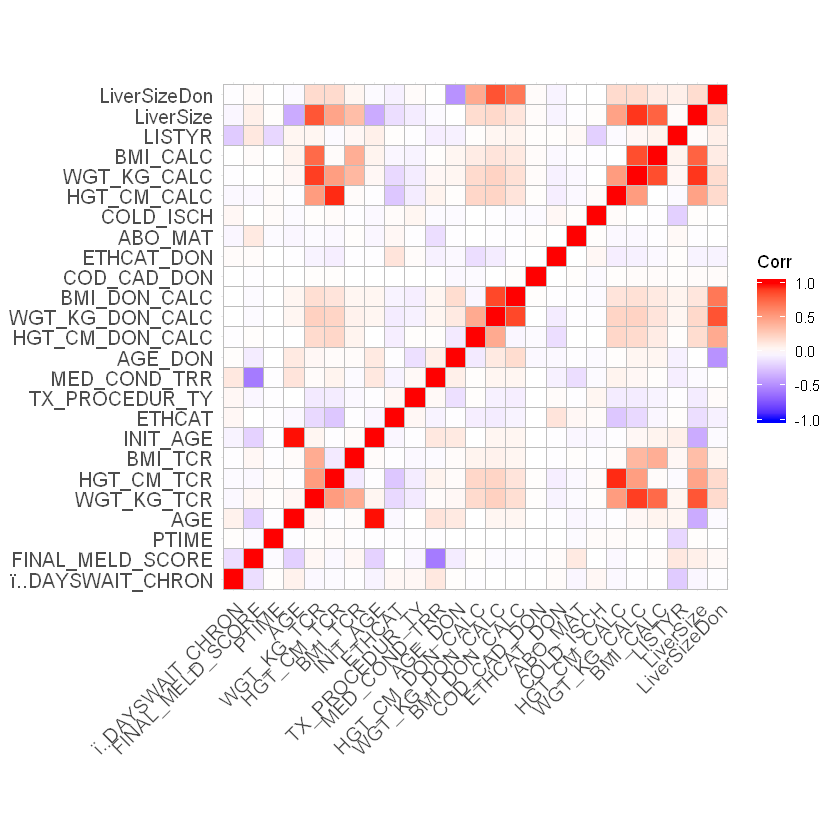

In [55]:
# Correlação entre as variáveis numéricas
# Para variáveis categóricas usamos associação
df_corr = round(cor(dados_num, use = "complete.obs"), 2)
ggcorrplot(df_corr)

# Padronização das variáveis numéricas e combinação em um novo dataframe  com as variáveis categóricas


# Modelagem Preditiva com Modelo de Regressão

# Vamos trabalhar apenas com algumas variáveis mais significativas para o problema.


# Avaliação do modelo

In [117]:
# Separação dos dados em dados de treino e dados de teste (70% para treino e 30% para teste)
index = sample(1:nrow(dados2), dim(dados2)[1]*.7)
dados_treino = dados2[index,]
dados_teste = dados2[-index,]

In [118]:
# Vamos separar variáveis numéricas e categóricas (treino)
dados_treino_num = dados_treino[,!unlist(lapply(dados_treino, is.factor))]
dim(dados_treino_num)
dados_treino_fator = dados_treino[,unlist(lapply(dados_treino, is.factor))]
dim(dados_treino_fator)

[1] 16343    25

[1] 16343    21

In [119]:
# Vamos separar variáveis numéricas e categóricas (teste)
dados_teste_num = dados_teste[,!unlist(lapply(dados_teste, is.factor))]
dim(dados_teste_num)
dados_teste_fator = dados_teste[,unlist(lapply(dados_teste, is.factor))]
dim(dados_teste_fator)

[1] 7005   25

[1] 7005   21

In [120]:
# Padronização dos dados de treino (colocando os dados na mesma escala)
dados_treino_num_norm = scale(dados_treino_num)
dados_treino_final = cbind(dados_treino_num_norm, dados_treino_fator)
dim(dados_treino_final)

[1] 16343    46

In [122]:
# Padronização dos dados de teste (colocando os dados na mesma escala)
dados_teste_num_norm = scale(dados_teste_num)
dados_teste_final = cbind(dados_teste_num_norm, dados_teste_fator)
dim(dados_teste_final)

[1] 7005   46

In [123]:
# Filtra os anos de 2001 e 2002
dados_treino_final = dados_treino_final %>%
  filter(TX_Year != 2001) %>%
  filter(TX_Year != 2002)

dados_teste_final =- dados_teste_final %>%
  filter(TX_Year != 2001) %>%
 filter(TX_Year != 2002)

In [124]:
# Criando o modelo de machine learning
modelo_v1 = lm(PTIME ~ FINAL_MELD_SCORE + 
                  REGION + 
                  LiverSize + 
                  LiverSizeDon + 
                  ALCOHOL_HEAVY_DON + 
                  MALIG + 
                  TX_Year,
                data = dados_treino_final)

In [125]:
# Resumo do modelo
summary(modelo_v1)


Call:
lm(formula = PTIME ~ FINAL_MELD_SCORE + REGION + LiverSize + 
    LiverSizeDon + ALCOHOL_HEAVY_DON + MALIG + TX_Year, data = dados_treino_final)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.80068 -0.25995 -0.00438  0.31942  1.99602 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.156800   0.335118  -0.468 0.639865    
FINAL_MELD_SCORE   -0.008365   0.005567  -1.503 0.132962    
REGION2             0.010859   0.031274   0.347 0.728434    
REGION3            -0.024044   0.030114  -0.798 0.424627    
REGION4             0.025076   0.032071   0.782 0.434284    
REGION5             0.041781   0.031139   1.342 0.179699    
REGION6             0.057458   0.041808   1.374 0.169364    
REGION7             0.012602   0.033408   0.377 0.706012    
REGION8             0.089930   0.034309   2.621 0.008772 ** 
REGION9             0.034322   0.035795   0.959 0.337647    
REGION10            0.025907   0.032452   0.798 0.424693  

# Avaliação do modelo

In [78]:
# Com dados de treino
modelo_v1_pred_1 = predict(modelo_v1, newdata = dados_treino_final)
accuracy(modelo_v1_pred_1, dados_treino_final$PTIME)


,ME,RMSE,MAE,MPE,MAPE
Test set,1.215583e-15,0.6631234,0.4685665,-57.52672,224.7542


In [79]:
# Com dados de teste
modelo_v1_pred_2 = predict(modelo_v1, newdata = dados_teste_final)
accuracy(modelo_v1_pred_2, dados_teste_final$PTIME)

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.001634371,0.677227,0.4810641,728.3442,786.0198


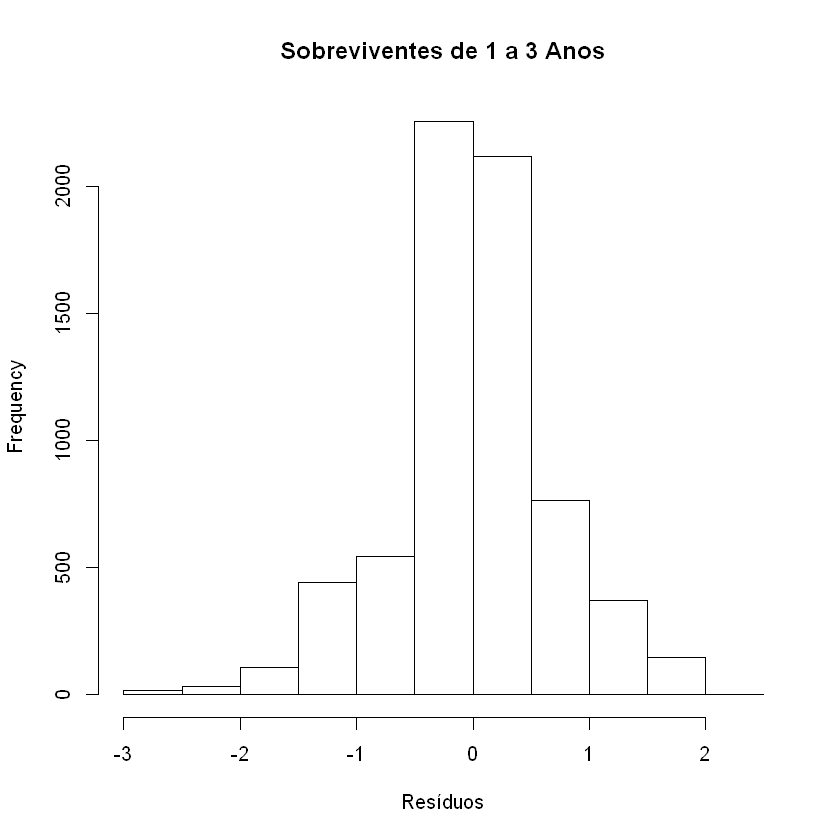

In [84]:
# Distribuição do erro de validação
par(mfrow = c(1,1))
residuos = dados_teste_final$PTIME - modelo_v1_pred_2
hist(residuos, xlab = "Resíduos", main = "Sobreviventes de 1 a 3 Anos")

In [126]:
# Vamos desfazer a escala dos dados
variaveis_amostra = c("PTIME",
                       "FINAL_MELD_SCORE",
                       "REGION",
                       "LiverSize",
                       "LiverSizeDon",
                       "ALCOHOL_HEAVY_DON",
                       "MALIG",
                       "TX_Year")

In [146]:
# Removemos valores NA das variáveis que usaremos para aplicar o unscale
dados_unscale = na.omit(dados2[,variaveis_amostra])

In [145]:
# Retorna os dados unscale
dados_final_unscale = dados_unscale[-index,] %>%
  filter(TX_Year!= 2001) %>%
  filter(TX_Year!= 2002)

,ME,RMSE,MAE,MPE,MAPE
Test set,464.9193,571.039,468.925,32.49856,125.7592


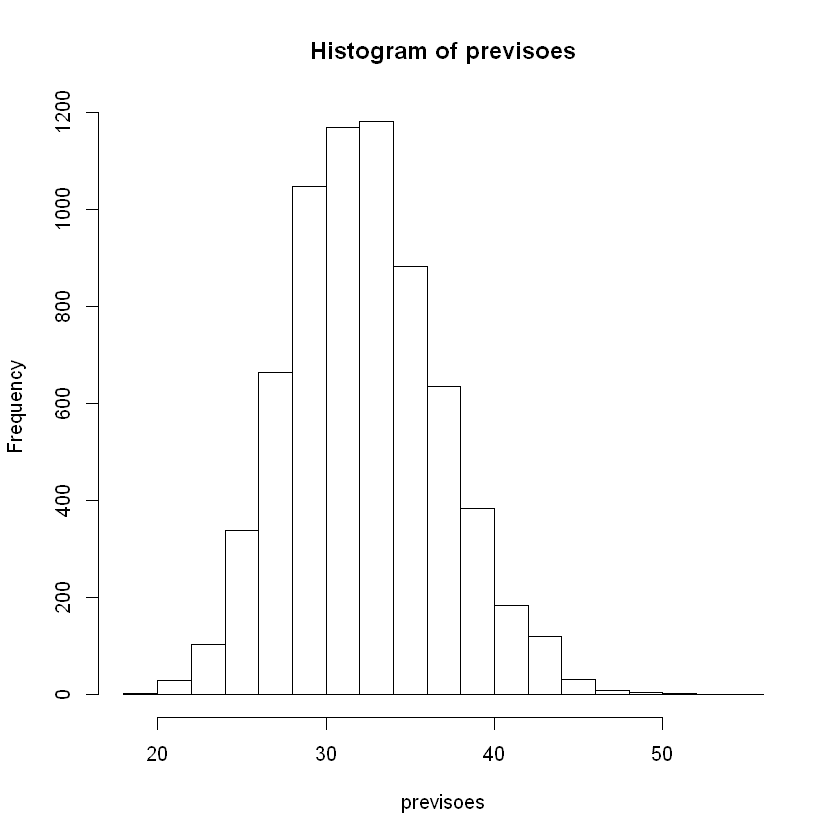

In [129]:
# Histograma dos dados sem escala (formato original)
previsoes = predict(modelo_v1, newdata = dados_final_unscale)
hist(previsoes)
accuracy(previsoes, dados_final_unscale$PTIME)

,ME,RMSE,MAE,MPE,MAPE
Test set,464.9193,571.039,468.925,32.49856,125.7592


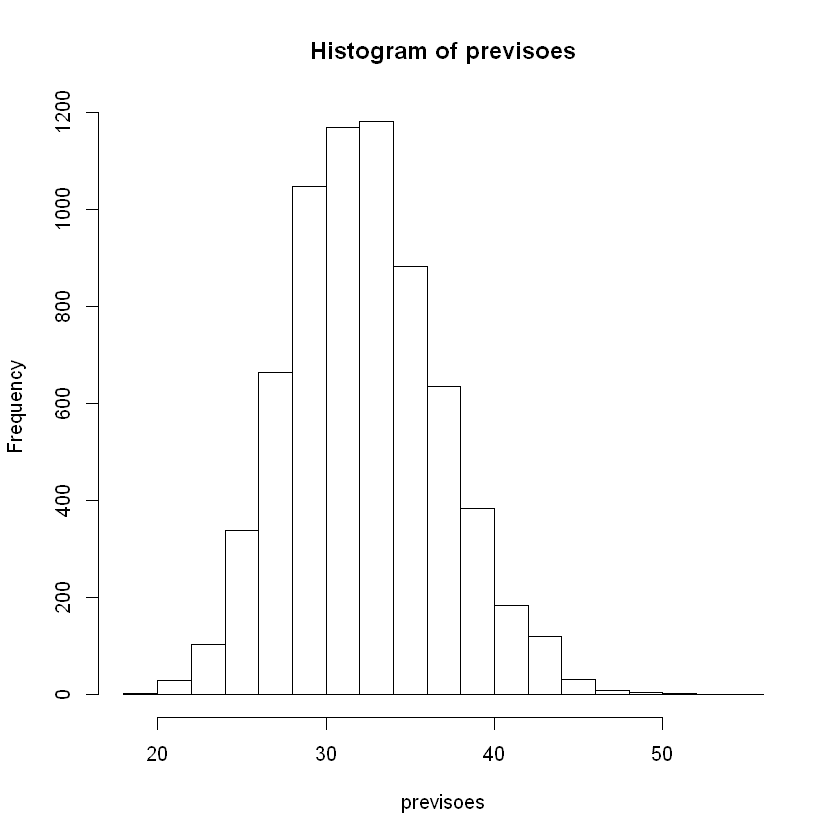

In [130]:
# Histograma dos dados sem escala (formato original)
previsoes = predict(modelo_v1, newdata = dados_final_unscale)
hist(previsoes)
accuracy(previsoes, dados_final_unscale$PTIME)

 <h2> Modelagem Preditiva com Modelo de Rede Neural </h3>

In [144]:
# Preparação dos dados
dados_final2 = na.omit(dados_final[,variaveis_amostra])
dim(dados_final2)
str(dados_final2)

[1] 22619     8

'data.frame':	22619 obs. of  8 variables:
 $ PTIME            : num  -1.363 0.745 -1.326 -1.105 -0.812 ...
 $ FINAL_MELD_SCORE : num  0.859 -0.406 -0.933 -1.038 -0.406 ...
 $ REGION           : Factor w/ 11 levels "1","2","3","4",..: 8 3 11 5 2 9 3 5 7 4 ...
 $ LiverSize        : num  -0.2862 -0.0409 1.705 0.8967 -0.2815 ...
 $ LiverSizeDon     : num  1.571 0.963 0.226 -0.61 -1.693 ...
 $ ALCOHOL_HEAVY_DON: Factor w/ 3 levels "N","U","Y": 1 1 1 3 2 1 1 3 1 1 ...
 $ MALIG            : Factor w/ 3 levels "N","U","Y": 3 1 1 1 1 3 1 1 1 1 ...
 $ TX_Year          : Factor w/ 18 levels "2001","2002",..: 11 4 6 7 5 6 5 6 7 5 ...
 - attr(*, "na.action")= 'omit' Named int  1 2 3 4 5 6 7 8 9 11 ...
  ..- attr(*, "names")= chr  "1" "2" "3" "4" ...


In [142]:
# Retorna somente as variáveis que não são do tipo fator
variaveis_numericas = !unlist(lapply(dados_final2, is.factor))

In [143]:
# Retorna o nome das variáveis numéricas
variaveis_numericas_nomes = names(dados_final2[,!unlist(lapply(dados_final2, is.factor))])

In [136]:
# Gera o dataframe final com variáveis dummy
df_final = cbind(dados_final2[,variaveis_numericas],
                 class.ind(dados_final2$REGION),
                 class.ind(dados_final2$ALCOHOL_HEAVY_DON),
                 class.ind(dados_final2$MALIG),
                 class.ind(dados_final2$TX_Year))

In [137]:
# Nomes das variáveis
names(df_final) = c(variaveis_numericas_nomes,
                    paste("REGION", c(1:11),sep = ""),
                    paste("ALCOHOL_HEAVY_DON", c(1:3),sep = ""),
                    paste("MALIG", c(1:3), sep = ""),
                    paste("LISTYR", c(01:18), sep = ""))

In [141]:
# Divisão em dados de treino e teste
index2 = sample(1:nrow(df_final), dim(df_final)[1]*.70)
dados_treino2 = df_final[index2,]
dados_teste2 = df_final[-index2,]
print(dados_teste2[1,])

       PTIME FINAL_MELD_SCORE  LiverSize LiverSizeDon REGION1 REGION2 REGION3
10 -1.362525        0.8593326 -0.2861933     1.571131       0       0       0
   REGION4 REGION5 REGION6 REGION7 REGION8 REGION9 REGION10 REGION11
10       0       0       0       0       1       0        0        0
   ALCOHOL_HEAVY_DON1 ALCOHOL_HEAVY_DON2 ALCOHOL_HEAVY_DON3 MALIG1 MALIG2
10                  1                  0                  0      0      0
   MALIG3 LISTYR1 LISTYR2 LISTYR3 LISTYR4 LISTYR5 LISTYR6 LISTYR7 LISTYR8
10      1       0       0       0       0       0       0       0       0
   LISTYR9 LISTYR10 LISTYR11 LISTYR12 LISTYR13 LISTYR14 LISTYR15 LISTYR16
10       0        0        1        0        0        0        0        0
   LISTYR17 LISTYR18
10        0        0


In [140]:
modelo_v2 = neuralnet::neuralnet(PTIME ~ ., 
                                  data = dados_treino2, 
                                  linear.output = TRUE,
                                  hidden = 2,
                                  stepmax = 1e7)

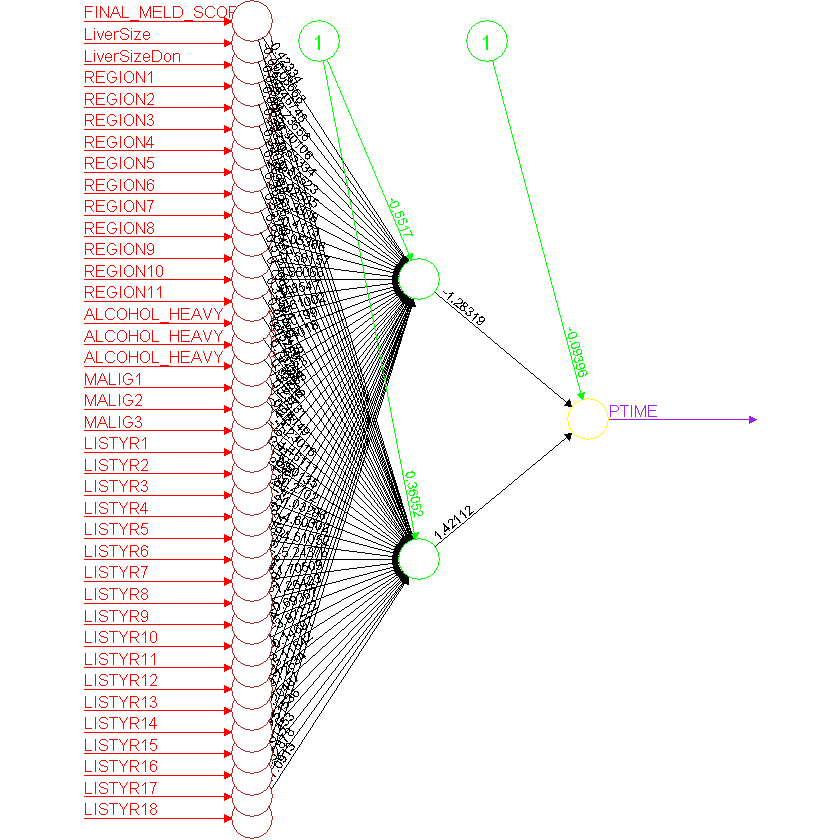

In [147]:
# Plot
plot(modelo_v2,
     col.entry.synapse = "red", 
     col.entry = "brown",
     col.hidden = "green", 
     col.hidden.synapse = "black",
     col.out = "yellow", 
     col.out.synapse = "purple",
     col.intercept = "green", 
     fontsize = 10,
     show.weights = TRUE ,
     rep = "best")

In [153]:
# Com dados de treino
modelo_v2_pred_1 = compute(modelo_v2, dados_treino2)
accuracy(unlist(modelo_v2_pred_1), dados_treino2$PTIME)

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.9983866,1.412044,1.187451,139.2369,305.3614


In [152]:
# Com dados de teste
modelo_v2_pred_2 = compute(modelo_v2, dados_teste2)
accuracy(unlist(modelo_v2_pred_2), dados_teste2$PTIME)

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.9972964,1.416469,1.189762,77.258,384.0849


<h2> Conclusão: A partir da análise e do modelo criado, é possível prever o tempo de sobrevivência dos pacientes 1 ano após receberem o transplante. <br/> <br/>

O modelo de regressão linear apresentou uma taxa de erro menor e, portanto,  deve ser usado como versão final. </h2>